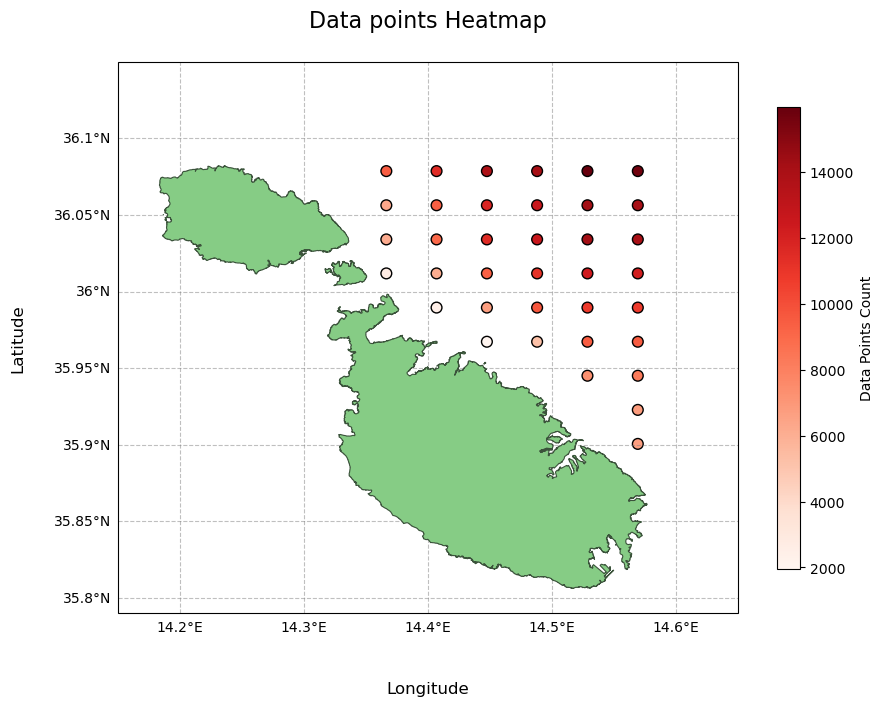

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import geopandas as gpd

# Load the counts and coordinates into a DataFrame
data = {
    'Latitude': [
        35.90060043334961, 35.92279815673828, 35.945098876953125,
        35.96730041503906, 35.96730041503906, 35.989601135253906,
        35.989601135253906, 35.989601135253906, 35.989601135253906,
        36.01190185546875, 36.01190185546875, 36.01190185546875,
        36.01190185546875, 36.03409957885742, 36.03409957885742,
        36.03409957885742, 36.03409957885742, 36.056400299072266,
        36.056400299072266, 36.056400299072266, 36.056400299072266,
        36.07870101928711, 36.07870101928711, 36.07870101928711,
        36.07870101928711, 36.07870101928711, 36.07870101928711,
        35.945098876953125, 36.03409957885742, 36.056400299072266,
        36.01190185546875, 36.03409957885742, 36.056400299072266,
        35.96730041503906, 35.989601135253906, 36.01190185546875,
        35.96730041503906
    ],
    'Longitude': [
        14.569199562072754, 14.569199562072754, 14.569199562072754,
        14.528599739074707, 14.569199562072754, 14.447500228881836,
        14.48799991607666, 14.528599739074707, 14.569199562072754,
        14.447500228881836, 14.48799991607666, 14.528599739074707,
        14.569199562072754, 14.447500228881836, 14.48799991607666,
        14.528599739074707, 14.569199562072754, 14.447500228881836,
        14.48799991607666, 14.528599739074707, 14.569199562072754,
        14.366399765014648, 14.406900405883789, 14.447500228881836,
        14.48799991607666, 14.528599739074707, 14.569199562072754,
        14.528599739074707, 14.406900405883789, 14.406900405883789,
        14.406900405883789, 14.366399765014648, 14.366399765014648,
        14.48799991607666, 14.406900405883789, 14.366399765014648,
        14.447500228881836
    ],
    'Count': [
        6694, 6804, 8293, 9458, 9507, 6729, 9718, 10792, 10783,
        9350, 11153, 12368, 12187, 11500, 12616, 14282, 14072,
        11792, 12634, 14282, 14120, 9464, 11484, 13834, 14137,
        15989, 15703, 7301, 8998, 9364, 6111, 6154, 6324, 5224,
        2489, 2683, 1964
    ]
}

df = pd.DataFrame(data)

# Load the shapefile for Malta's coastline
shapefile_path = '../Data/land_sea_mask/MaltaCoastline.shp'
malta_coastline = gpd.read_file(shapefile_path).to_crs(epsg=4326)

# Prepare the plot with a geographic (Plate Carree) projection
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Set the extent based on your geographic boundaries
ax.set_extent([14.15, 14.65, 35.79, 36.15])

# Plot the coastline
malta_coastline.plot(ax=ax, color='#86CC85', edgecolor='#3B533B', linewidth=0.8, zorder=4)

# Create the heatmap using a scatter plot, using the actual count values for the color
scatter = ax.scatter(
    df['Longitude'], df['Latitude'],
    s=60,  # Size of the points, you can adjust this to your preference
    c=df['Count'],  # Color of points based on the count
    cmap='Reds',  # Color map used for the heatmap
    edgecolor='k',
    transform=ccrs.Geodetic()
)

# Add colorbar to the right of the plot, using the actual count values
cbar = plt.colorbar(scatter, ax=ax, shrink=0.6)
cbar.set_label('Data Points Count')

# Add gridlines and labels to improve map readability
gl = ax.gridlines(draw_labels=True, linewidth=0.8, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Customize the plot appearance
plt.title("Data points Heatmap", pad=25, fontsize=16)
ax.text(-0.15, 0.50, 'Latitude', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes, fontsize=12)
ax.text(0.5, -0.15, 'Longitude', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax.transAxes, fontsize=12)

# Show the plot
plt.show()